# **EDA Assignment Questions**

# EDA - 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/BIKE DETAILS.csv')
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


1. What is the range of selling price in dataset?

In [ ]:
selling_prices = df['selling_price']

price_range = selling_prices.max() - selling_prices.min()
print(f"The range of selling prices is: {price_range}")

The range of selling prices is: 755000


2. What is the median selling price for bikes in the dataset?

In [ ]:
selling_prices = df['selling_price']

median_price = selling_prices.median()
print(f"The median selling price is: {median_price}")

The median selling price is: 45000.0


3. What is the most common seller type?

In [ ]:
seller_types = df['seller_type']

most_common_seller_type = seller_types.mode()[0]  # [0] to get the first element (mode can return multiple values)
print(f"The most common seller type is: {most_common_seller_type}")

The most common seller type is: Individual


4. How many bikes have driven more than 50,000 kilometers?

In [ ]:
km_driven = df['km_driven']

filtered_bikes = df[km_driven > 50000]

num_bikes = len(filtered_bikes)
print(f"Number of bikes driven more than 50,000 kilometers: {num_bikes}")


Number of bikes driven more than 50,000 kilometers: 170


5. What is the average km_driven value for each ownership type?

In [ ]:
average_km_by_ownership = df.groupby('owner')['km_driven'].mean()
print(average_km_by_ownership)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


6. What proportion of bikes are from the year 2015 or older?

In [ ]:
# Assuming 'year' column represents the year of the bike
older_bikes = df[df['year'] <= 2015]
proportion = len(older_bikes) / len(df)
print(f"Proportion of bikes from 2015 or older: {proportion}")

Proportion of bikes from 2015 or older: 0.5664467483506126


7. What is the trend of missing values across the dataset?

Missing Values Trend:
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


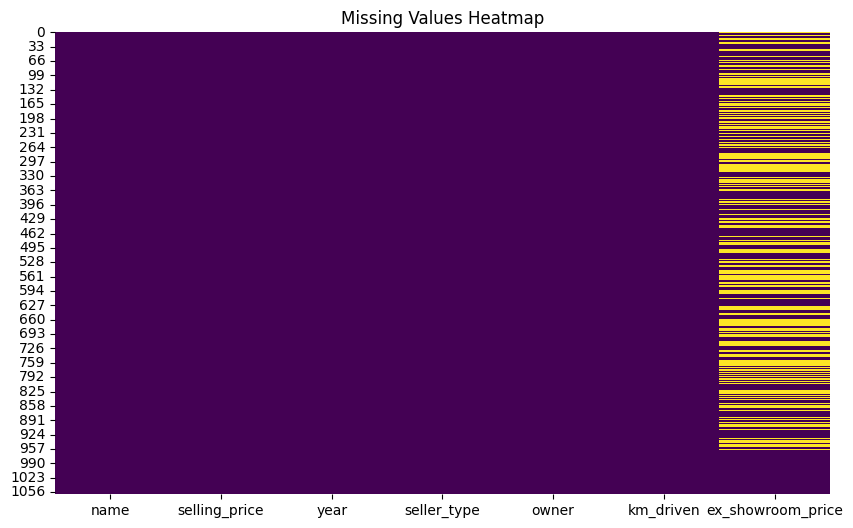

In [ ]:
# Calculate missing values for each column
missing_values = df.isnull().sum()

# Calculate percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100

# Display the results
print("Missing Values Trend:")
print(missing_percentage)

# Visualize the missing values (optional)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

8. What is the highest ex_showroom_price recorded, and for which bike?

In [ ]:
# Find the maximum ex_showroom_price
max_price = df['ex_showroom_price'].max()

# Find the bike with the maximum price
bike_with_max_price = df[df['ex_showroom_price'] == max_price]['name'].iloc[0]

# Print the results
print(f"The highest ex_showroom_price recorded is: {max_price}")
print(f"This price is for the bike: {bike_with_max_price}")

The highest ex_showroom_price recorded is: 1278000.0
This price is for the bike: Harley-Davidson Street Bob


9. What is the total number of bikes listed by each seller type?

In [ ]:
bike_counts_by_seller_type = df['seller_type'].value_counts()
print(bike_counts_by_seller_type)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


10. What is the relationship between selling_price and km_driven for first-owner bikes?

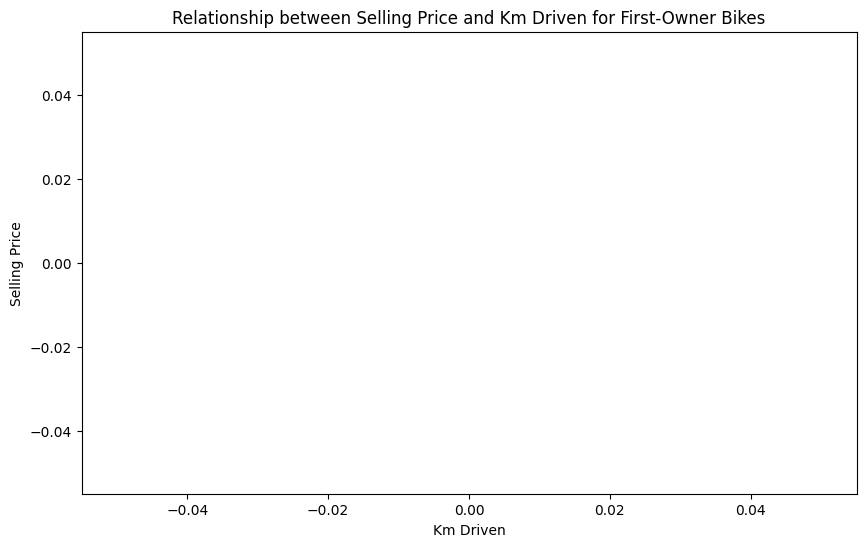

Correlation coefficient: nan


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for first-owner bikes
first_owner_bikes = df[df['owner'] == 'First Owner']

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Relationship between Selling Price and Km Driven for First-Owner Bikes')
plt.xlabel('Km Driven')
plt.ylabel('Selling Price')
plt.show()

# Calculate the correlation coefficient
correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
print(f"Correlation coefficient: {correlation}")

11. Identify and remove outliers in the km_driven column using the IQR method.

In [ ]:
import numpy as np

# Calculate quantiles
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter data to remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Print the shape of the original and filtered DataFrames
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

Original DataFrame shape: (1061, 7)
DataFrame shape after removing outliers: (1022, 7)


12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

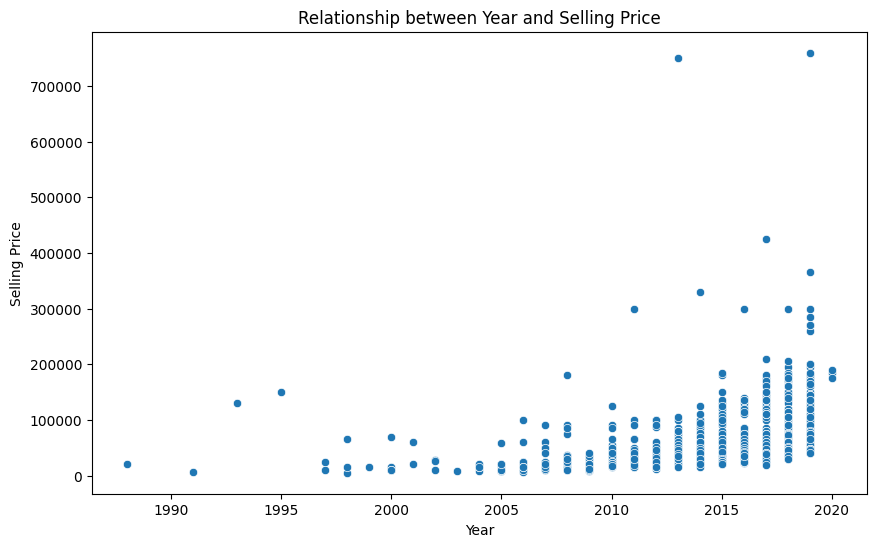

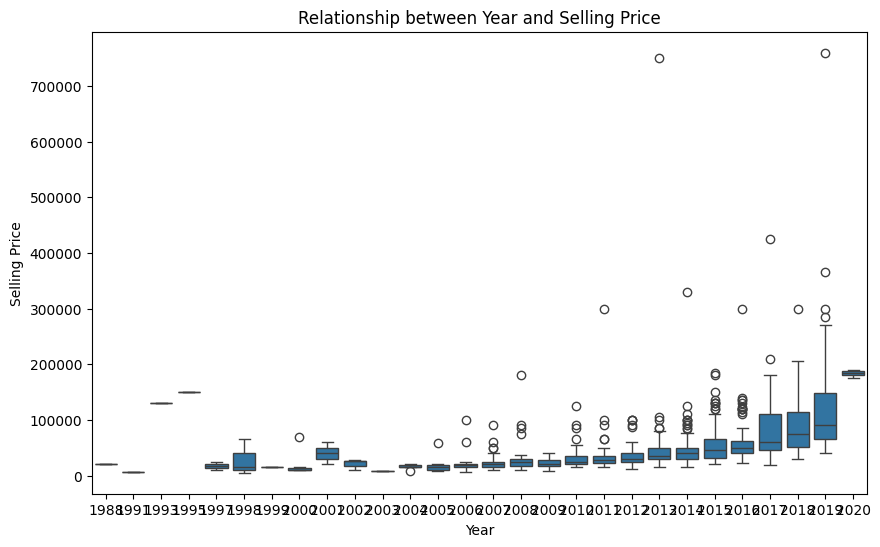

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

# Create a box plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(x='year', y='selling_price', data=df)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

In [ ]:
import pandas as pd

# Assuming 'year' column represents the manufacturing year
# and you want to calculate depreciation relative to the current year (e.g., 2023)

current_year = 2023  # Replace with the actual current year

# Calculate bike age
df['bike_age'] = current_year - df['year']

# Calculate average depreciation for each age group
average_depreciation_by_age = df.groupby('bike_age')['selling_price'].mean()

# Display the results
print("Average Depreciation by Bike Age:")
print(average_depreciation_by_age)

Average Depreciation by Bike Age:
bike_age
3     183333.333333
4     119689.511628
5      87660.374046
6      78894.736842
7      58469.018692
8      56500.000000
9      48668.131868
10     51136.986301
11     35748.400000
12     35655.721311
13     31793.333333
14     22267.857143
15     34289.285714
16     24927.586207
17     23380.000000
18     16978.571429
19     15100.000000
20      8000.000000
21     20666.666667
22     40000.000000
23     20833.333333
24     15000.000000
25     28333.333333
26     17500.000000
28    150000.000000
30    130000.000000
32      6000.000000
35     20000.000000
Name: selling_price, dtype: float64


14. Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
import pandas as pd

# Calculate the average selling price for each year
average_price_by_year = df.groupby('year')['selling_price'].mean()

# Function to check if a bike's price is significantly above average
def is_significantly_above_average(row, threshold=1.5):  # Adjust threshold as needed
  year_average = average_price_by_year.loc[row['year']]
  return row['selling_price'] > year_average * threshold

# Apply the function to identify overpriced bikes
df['overpriced'] = df.apply(is_significantly_above_average, axis=1)

# Filter and display the overpriced bikes
overpriced_bikes = df[df['overpriced']]['name'].unique()
print("Bikes priced significantly above average for their year:")
for bike in overpriced_bikes:
  print(bike)

Bikes priced significantly above average for their year:
Royal Enfield Classic Gunmetal Grey
Royal Enfield Bullet 350 [2007-2011]
Yamaha YZF R3
Jawa Standard
Royal Enfield Thunderbird 350
Honda CBR-250R
Bajaj Dominar 400
KTM 390 Duke
Royal Enfield Electra 5 S
Royal Enfield Bullet 350
Royal Enfield Electra 4 S
Mahindra Mojo XT300
Hero Honda Karizma ZMR [2010]
Royal Enfield Thunderbird 350X
Royal Enfield Classic Desert Storm
Yamaha FZ25
UM Renegade Commando
Royal Enfield Classic 350
Royal Enfield Continental GT 650
Harley-Davidson Street Bob
KTM 390 Duke ABS [2013-2016]
Royal Enfield Classic 500
KTM RC 390
Bajaj Pulsar 150
KTM RC 200
Honda CB Unicorn 150
Royal Enfield Bullet 500
Bajaj Dominar 400 [2018]
Royal Enfield Interceptor 650
Royal Enfield Machismo
KTM 250 Duke
Kawasaki Ninja 650 [2018-2019]
Kawasaki Ninja 250R
Suzuki GSX S750
Yamaha Rx
Yamaha Fazer Dlx
Harley-Davidson Street 750
TVS Apache RR310
BMW G310GS
Royal Enfield Thunderbird 500
Royal Enfield Himalayan
KTM 200 Duke
Royal E

15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

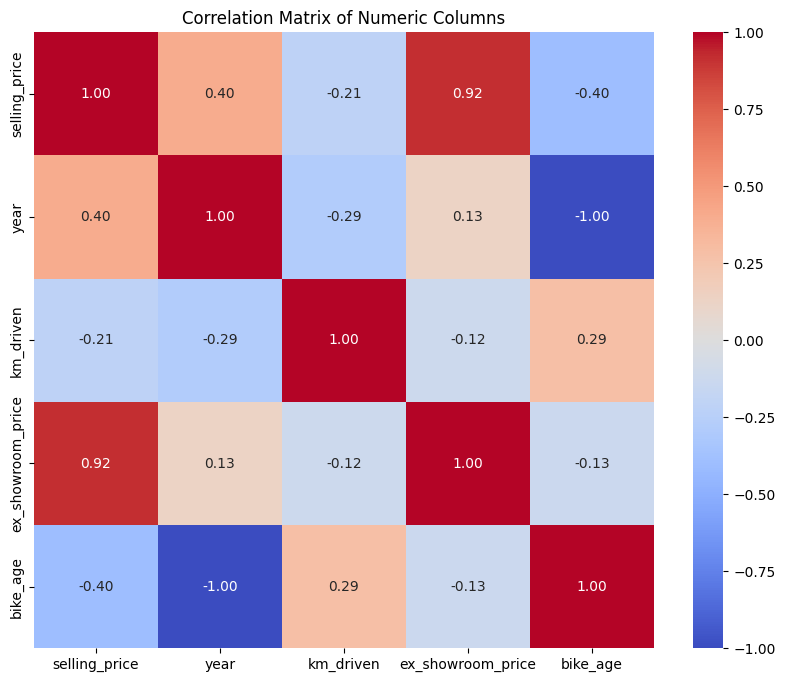

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize using a heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# EDA - 2

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [98]:
df = pd.read_csv('/content/Car Sale.csv')
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [108]:
# Display basic information about the DataFrame
print(df.info())
print(df.describe(include='all'))

# Check the first few rows to understand data types and structure
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23905 non-null  object
 1   Date           23905 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23905 non-null  object
 4   Annual Income  23905 non-null  int64 
 5   Dealer_Name    23905 non-null  object
 6   Company        23905 non-null  object
 7   Model          23905 non-null  object
 8   Engine         23905 non-null  object
 9   Transmission   23905 non-null  object
 10  Color          23905 non-null  object
 11  Price ($)      23905 non-null  int64 
 12  Dealer_No      23905 non-null  object
 13  Body Style     23905 non-null  object
 14  Phone          23905 non-null  int64 
 15  Dealer_Region  23905 non-null  object
dtypes: int64(3), object(13)
memory usage: 3.1+ MB
None
              Car_id      Date Customer Name Gender  Annual Income

In [109]:
# Check for duplicate entries
duplicates = df.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")

# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Consider dropping duplicates or filling/handling missing values as necessary


Number of duplicate entries: 0
Missing values per column:
Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64


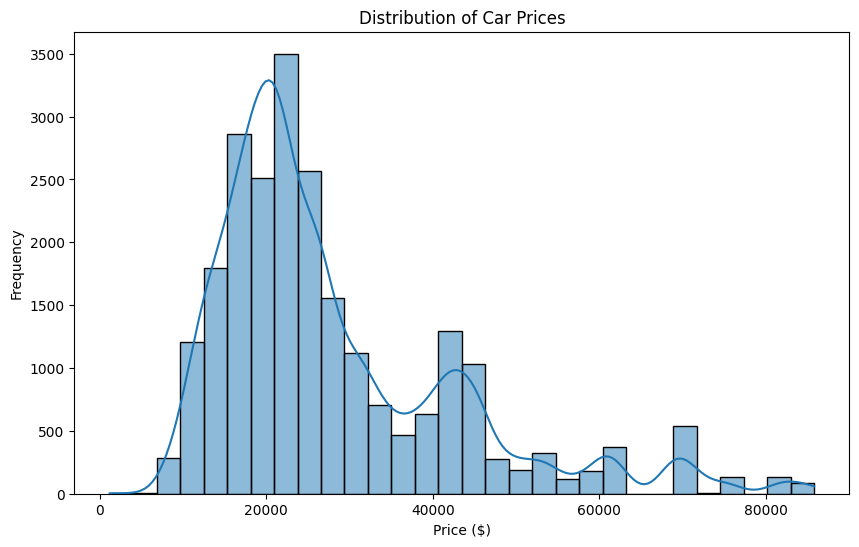

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Price ($)'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()


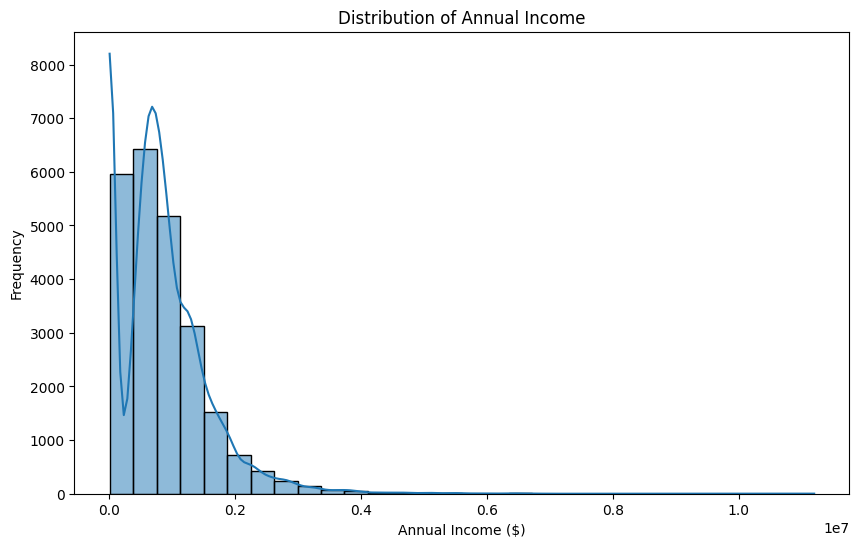

In [111]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income'], bins=30, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income ($)')
plt.ylabel('Frequency')
plt.show()


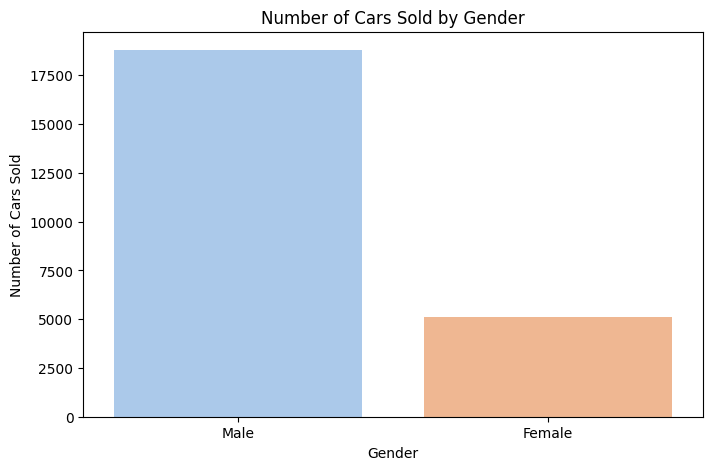

In [112]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('Number of Cars Sold by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cars Sold')
plt.show()


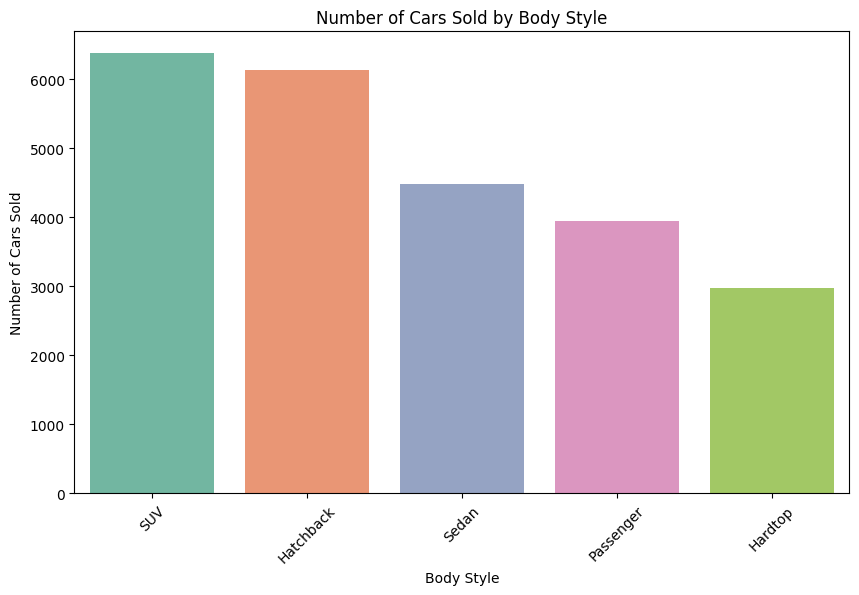

In [113]:
body_style_counts = df['Body Style'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='Set2')
plt.title('Number of Cars Sold by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()


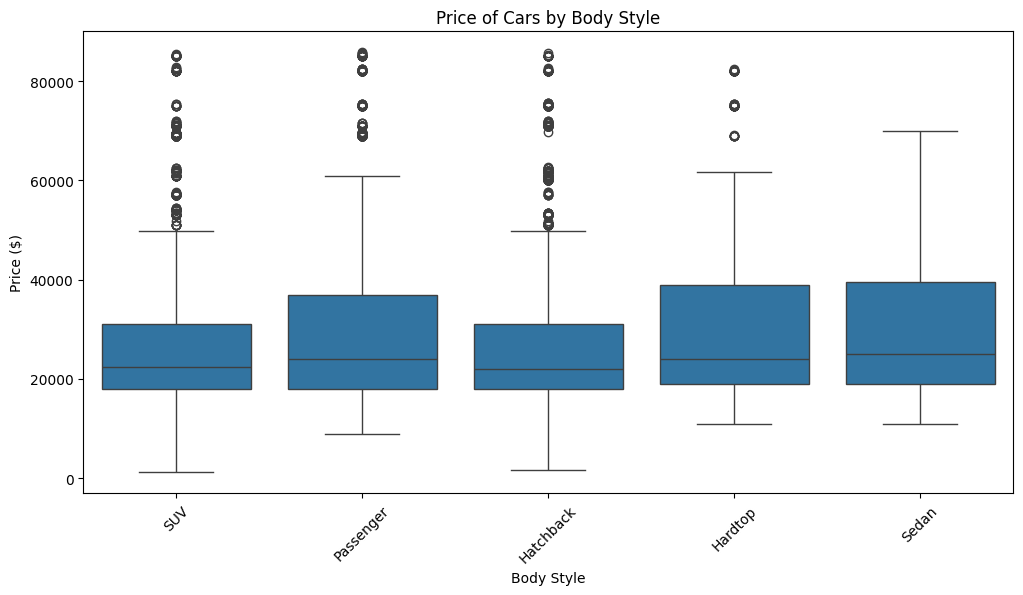

In [114]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', data=df)
plt.title('Price of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()


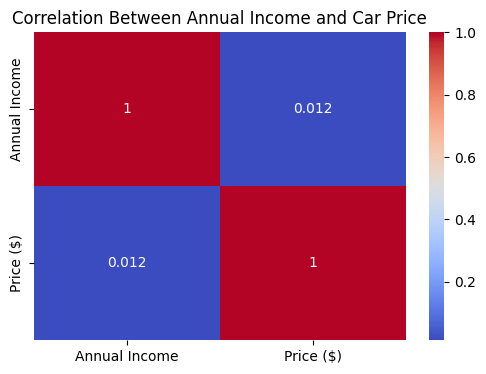

In [115]:
correlation_matrix = df[['Annual Income', 'Price ($)']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Annual Income and Car Price')
plt.show()


In [116]:
plt.savefig('price_distribution.png')  # Example save command for a figure


<Figure size 640x480 with 0 Axes>

# EDA - 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 1465, and columns are 16.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [ ]:
df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

In [ ]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')

df['discount_percentage'] = df['discount_percentage'] / 100

In [ ]:
df['rating'].value_counts()

,count
rating,
4.1,244
4.3,230
4.2,228
4.0,129
3.9,123
4.4,123
3.8,86
4.5,75
4,52


In [ ]:
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [ ]:
df['rating'] = df['rating'].str.replace('|', '3.9').astype('float64')

In [ ]:
df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [ ]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1463.000000
mean,3125.310874,5444.990635,0.476915,4.096451,18295.541353
std,6944.304394,10874.826864,0.216359,0.291620,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1186.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17336.500000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


In [ ]:
df.isnull().sum().sort_values(ascending = False)

,0
rating_count,2
product_id,0
category,0
product_name,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
about_product,0
user_id,0


In [ ]:
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

,0
rating_count,0.14
product_id,0.00
category,0.00
product_name,0.00
discounted_price,0.00
actual_price,0.00
discount_percentage,0.00
rating,0.00
about_product,0.00
user_id,0.00


In [ ]:
df.isnull().sum().sum()

np.int64(2)

<Axes: >

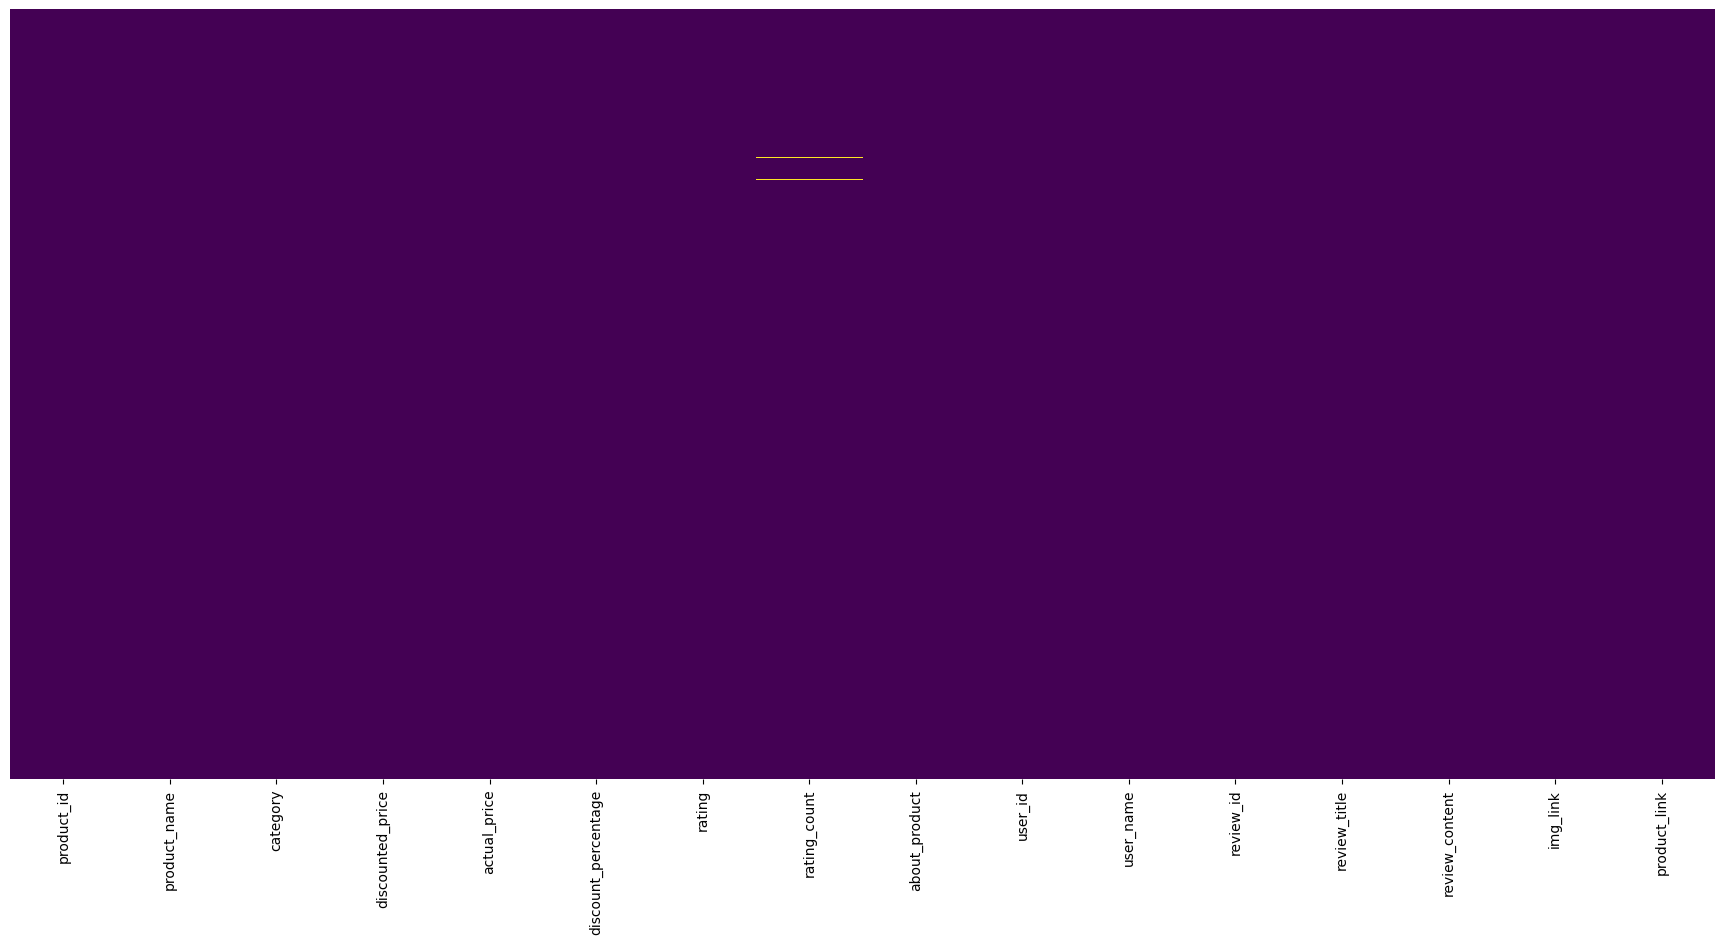

In [ ]:
# make a figure size
plt.figure(figsize=(22, 10))
# plot the null values in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

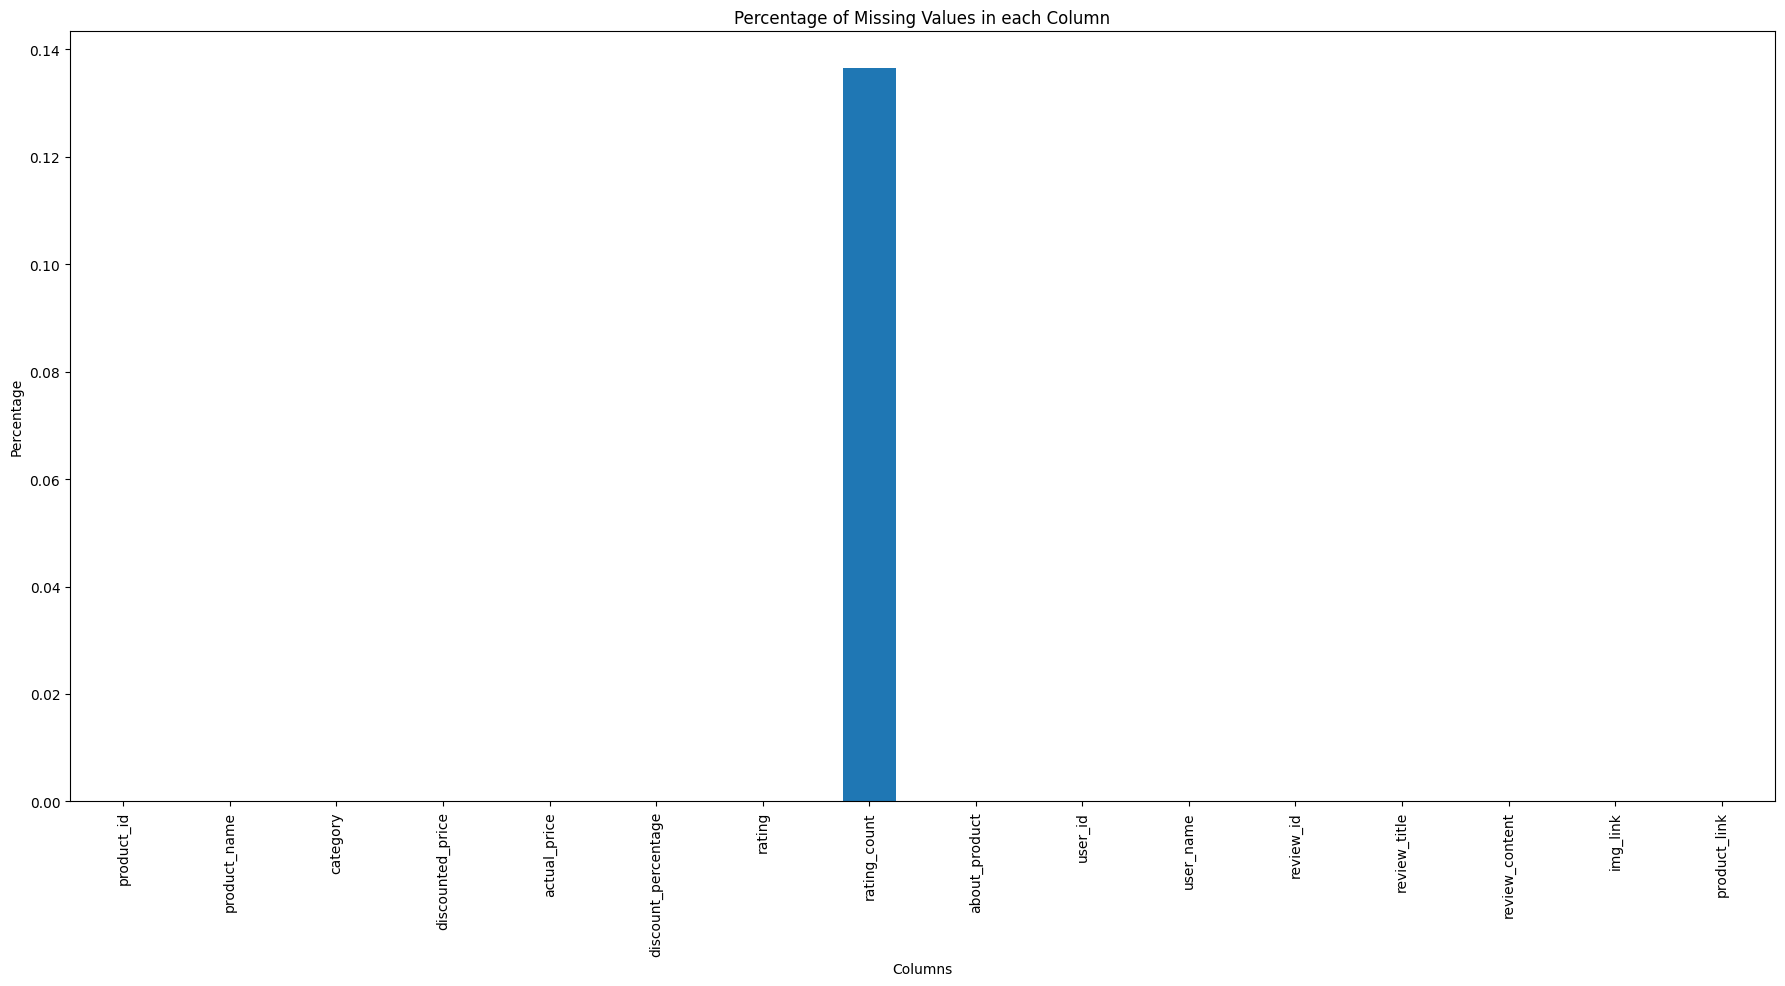

In [ ]:
# make figure size
plt.figure(figsize=(22, 10))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

In [ ]:
df[df['rating_count'].isnull()].head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [ ]:
# Impute missing values
df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].median())

In [ ]:
df.isnull().sum().sort_values(ascending = False)

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


In [ ]:
# Find Duplicate
df.duplicated().any()

np.False_

In [ ]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
any_duplicates = df.duplicated(subset=['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link']).any()

In [ ]:
any_duplicates

np.False_

1. What is the average rating for each product category?

In [ ]:

average_rating_by_category = df.groupby('category')['rating'].mean()
average_rating_by_category


,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


2. What are the top rating_count products by category?

In [ ]:

top_products_by_category = df.groupby('category').apply(lambda x: x.nlargest(5, 'rating_count'))
print(top_products_by_category[['product_name', 'rating_count']])


                                                                                              product_name  \
category                                                                                                     
Car&Motorbike|CarAccessories|InteriorAccessorie... 1157  Reffair AX30 [MAX] Portable Air Purifier for C...   
Computers&Accessories|Accessories&Peripherals|A... 695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
                                                   742   Kanget [2 Pack] Type C Female to USB A Male Ch...   
Computers&Accessories|Accessories&Peripherals|A... 906   Hp Wired On Ear Headphones With Mic With 3.5 M...   
Computers&Accessories|Accessories&Peripherals|A... 748   JBL Commercial CSLM20B Auxiliary Omnidirection...   
...                                                                                                    ...   
OfficeProducts|OfficePaperProducts|Paper|Statio... 858   Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + ...   
OfficeProd

3. What is the distribution of discounted prices vs. actual prices?

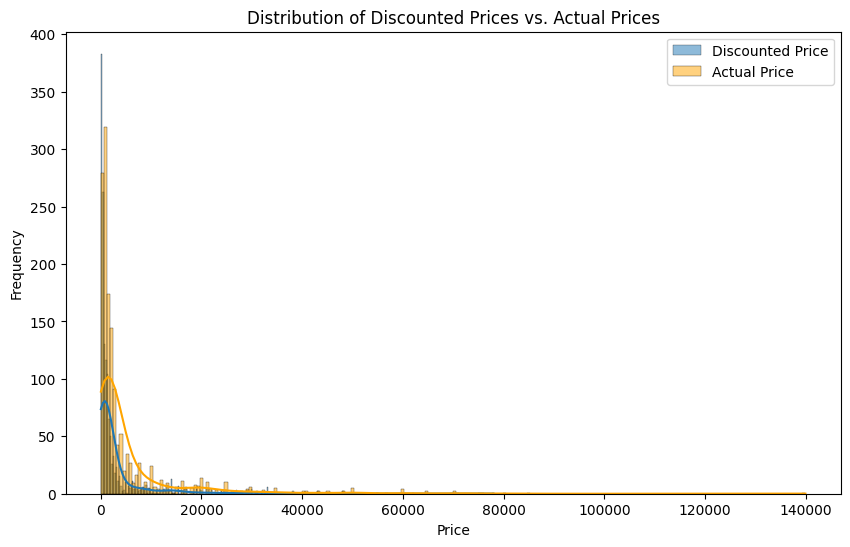

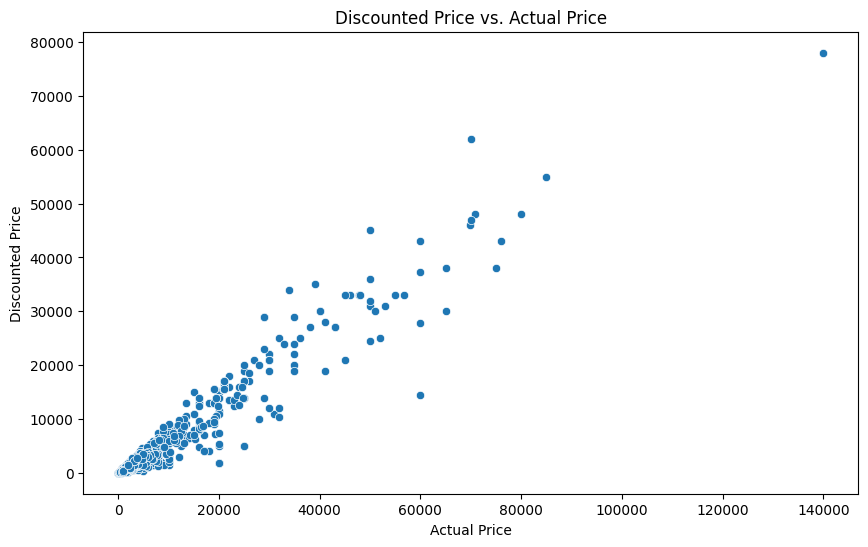

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'df' and you've already cleaned the price columns as shown in your provided code

plt.figure(figsize=(10, 6))
sns.histplot(df['discounted_price'], label='Discounted Price', kde=True)
sns.histplot(df['actual_price'], label='Actual Price', kde=True, color='orange')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Optional: Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='discounted_price', data=df)
plt.title('Discounted Price vs. Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()


4. How does the average discount percentage vary across categories?

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    0.420
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   0.785
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           0.350
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        0.565
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           0.465
                                                                                                                          ...  
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        0.000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|L

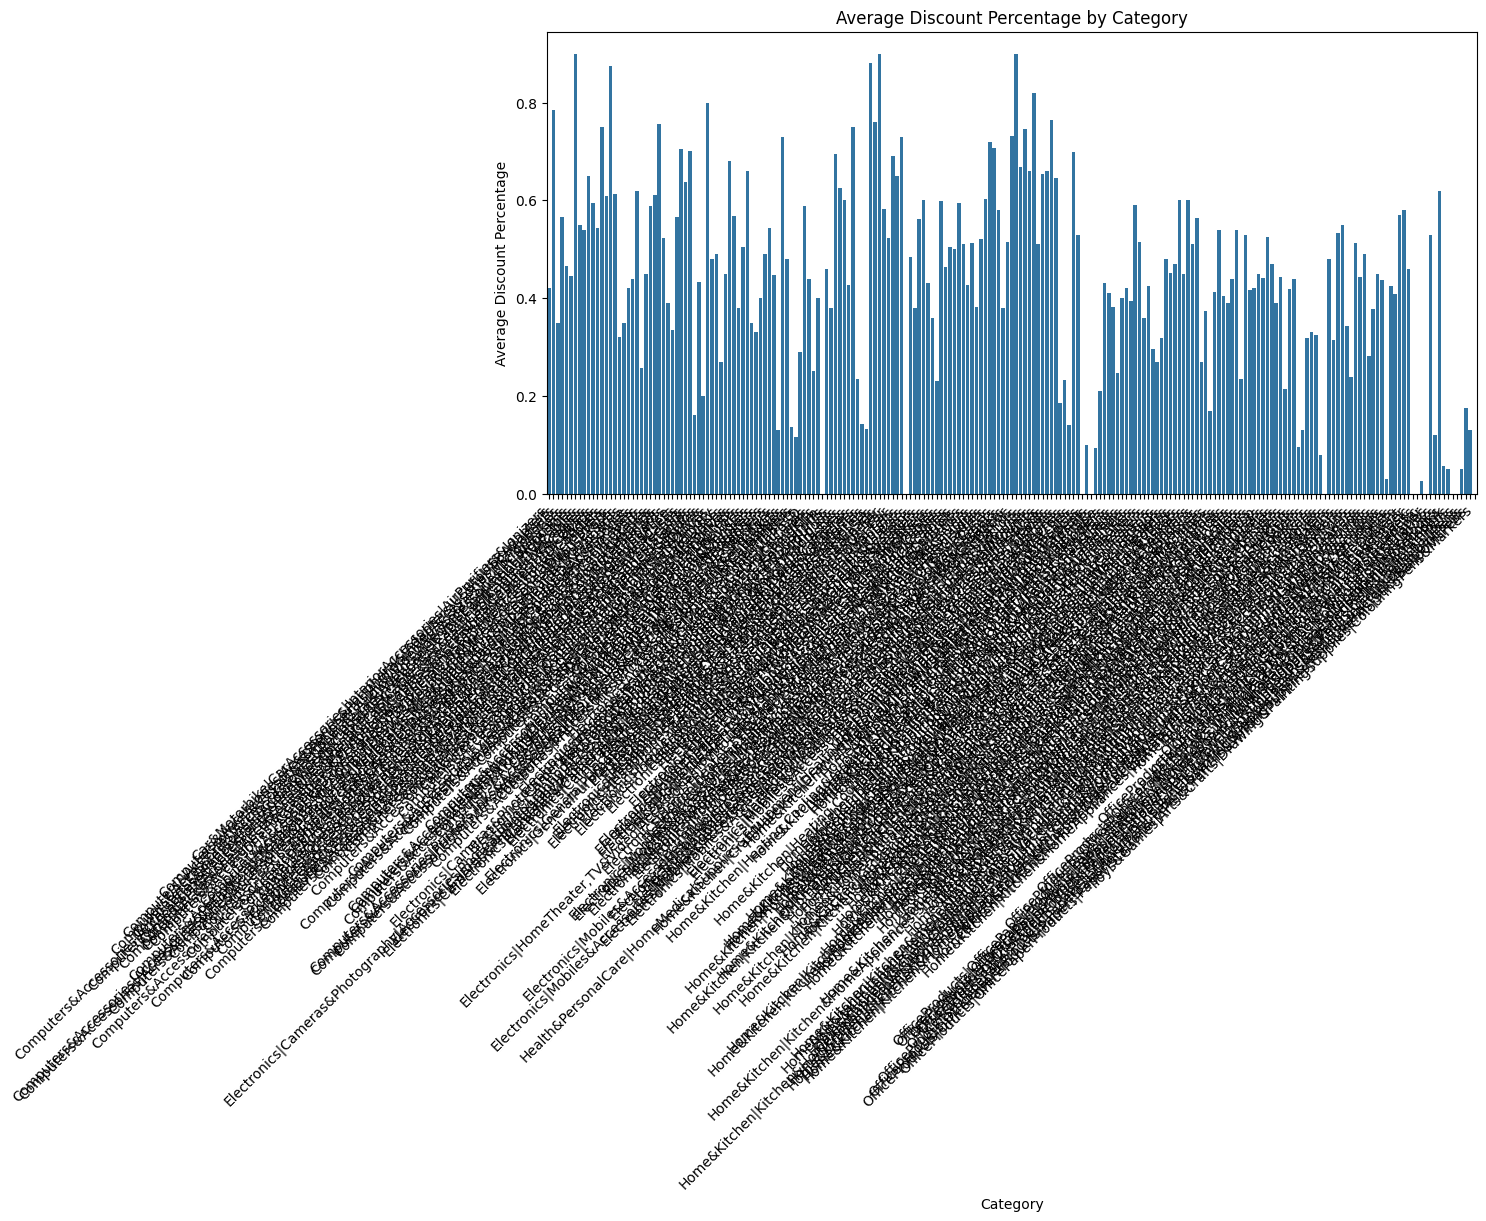

In [ ]:

import matplotlib.pyplot as plt
average_discount_by_category = df.groupby('category')['discount_percentage'].mean()
print(average_discount_by_category)

# Create a bar plot to visualize the average discount percentage across categories
plt.figure(figsize=(12, 6))
sns.barplot(x=average_discount_by_category.index, y=average_discount_by_category.values)
plt.title('Average Discount Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


5.  What are the most popular product names?

In [ ]:

popular_products = df['product_name'].value_counts().head(10)  # Get the top 10 most frequent product names
popular_products


,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3
Flix Micro Usb Cable For Smartphone (Black),3
"Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating",3
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",3
"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",3


6. What are the most popular product keywords?

In [ ]:

from collections import Counter

def extract_keywords(text):
    # Basic keyword extraction (can be improved with NLP techniques)
    keywords = []
    words = text.lower().split()
    for word in words:
        if word.isalpha() and len(word) > 2:  # Filter out short words and non-alphabetic characters
            keywords.append(word)
    return keywords

all_keywords = []
for product_name in df['product_name']:
    all_keywords.extend(extract_keywords(str(product_name)))  # Handle potential NaN values

keyword_counts = Counter(all_keywords)
most_common_keywords = keyword_counts.most_common(10)  # Get the top 10 most frequent keywords

print("Most Popular Product Keywords:")
for keyword, count in most_common_keywords:
    print(f"{keyword}: {count}")


Most Popular Product Keywords:
with: 751
for: 672
usb: 377
and: 330
cable: 320
charging: 219
fast: 211
smart: 171
type: 144
compatible: 138


7. What are the most popular product reviews?

In [ ]:

# Assuming 'df' is your DataFrame from the previous code.
# We'll need to define a metric for "popularity" of reviews.
# Let's use the 'rating_count' as a proxy for popularity.

# Sort the DataFrame by rating_count in descending order
popular_reviews = df.sort_values('rating_count', ascending=False)

# Display the top 10 most popular reviews with their relevant information.
print(popular_reviews[['product_name', 'review_title', 'review_content', 'rating_count']].head(10))


                                          product_name  \
12   AmazonBasics Flexible Premium HDMI Cable (Blac...   
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...   
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...   
684  AmazonBasics Flexible Premium HDMI Cable (Blac...   
400  boAt Bassheads 100 in Ear Wired Earphones with...   
352  boAt Bassheads 100 in Ear Wired Earphones with...   
584  boAt BassHeads 100 in-Ear Wired Headphones wit...   
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...   
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...   
566  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...   

                                          review_title  \
12   It's quite good and value for money,Works well...   
65   It's quite good and value for money,Works well...   
47   It's quite good and value for money,Works well...   
684  It's quite good and value for money,Works well...   
400  Best value for money,HEAD PHONE POUCH NOT RECE...   
352  Best val

8. What is the correlation between discounted_price and rating?

In [ ]:

# Calculate the correlation between 'discounted_price' and 'rating'
correlation = df['discounted_price'].corr(df['rating'])

print(f"The correlation between discounted_price and rating is: {correlation}")


The correlation between discounted_price and rating is: 0.12038590592557345


9.  What are the Top 5 categories based on the highest rating?   

In [ ]:

top_5_categories = average_rating_by_category.sort_values(ascending=False).head(5)
top_5_categories


,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Computers&Accessories|Components|Memory,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5


10.  Identify any potential areas for improvement or optimization based on the data analysis.

In [ ]:

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def extract_keywords_nlp(text):
  #... (More advanced NLP code goes here)
  pass # Placeholder

# Incorporate this improved keyword function into your analysis


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# EDA - 4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/spotify.csv')
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


In [ ]:
print(df.isnull().sum())

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


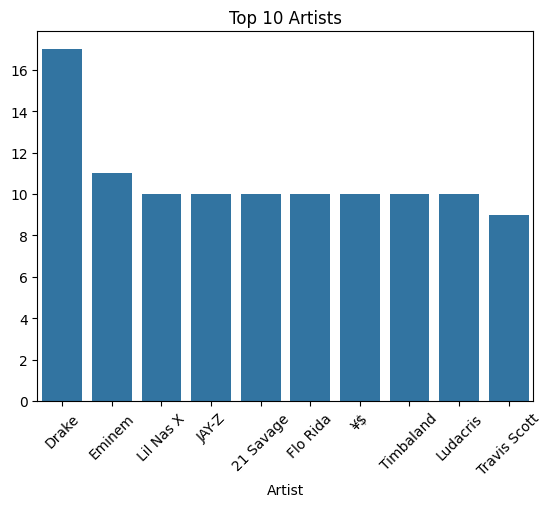

In [ ]:
top_artists = df['Artist'].value_counts().head(10)
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.xticks(rotation=45)
plt.title('Top 10 Artists')
plt.show()

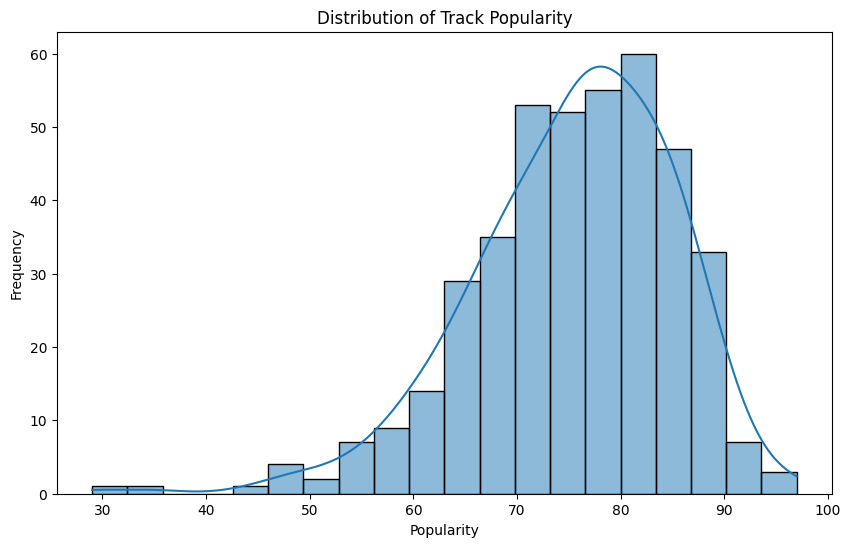

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


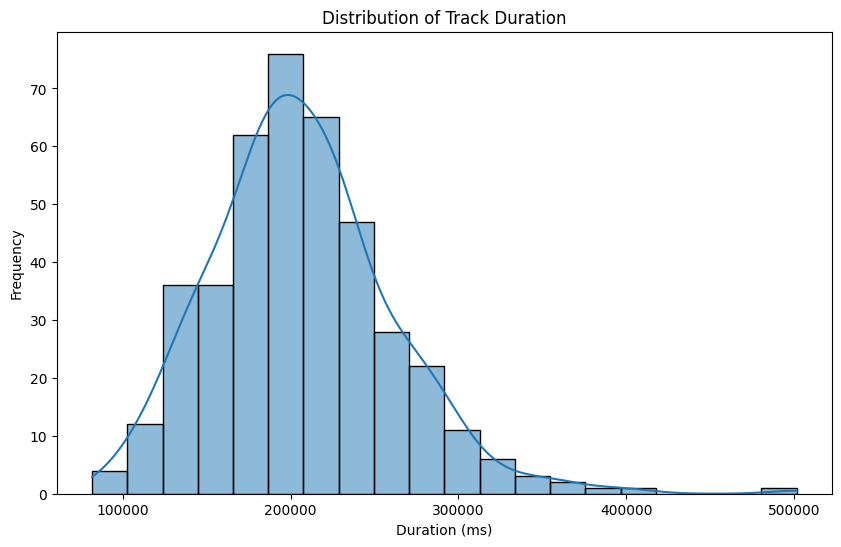

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration (ms)'], bins=20, kde=True)
plt.title('Distribution of Track Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.show()


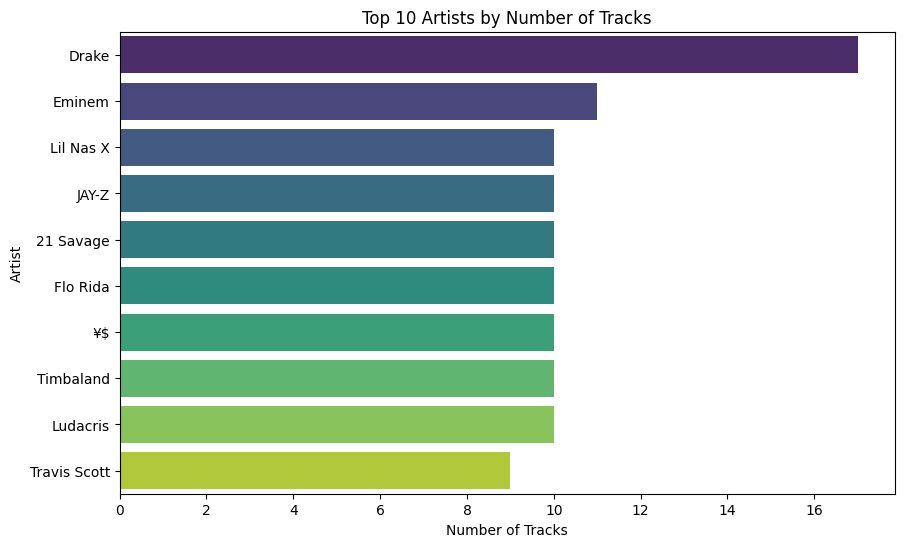

In [ ]:
if 'Artist' in df.columns:
    top_artists = df['Artist'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
    plt.title('Top 10 Artists by Number of Tracks')
    plt.xlabel('Number of Tracks')
    plt.ylabel('Artist')
    plt.show()


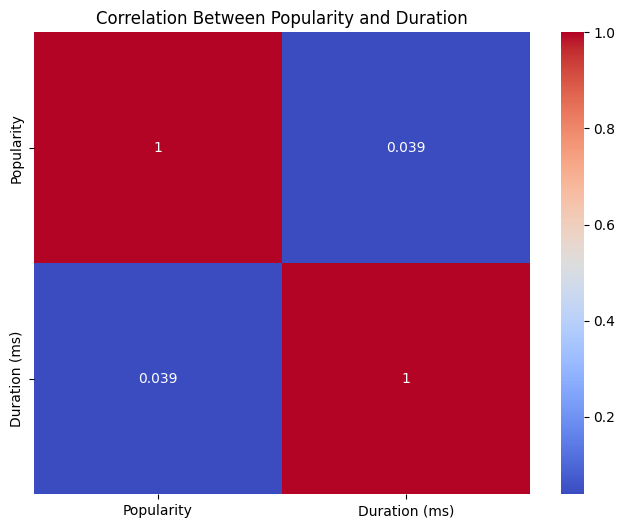

In [ ]:
correlation_matrix = df[['Popularity', 'Duration (ms)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Popularity and Duration')
plt.show()


1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.

In [ ]:

import numpy as np
# Check for null values
print(df.isnull().sum())

# Handle null values (example: fill with mean for numeric columns)
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Alternative: drop rows with any null values
# df.dropna(inplace=True)

# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify changes
print(df.isnull().sum())
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows: 27
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows after removal: 0


2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

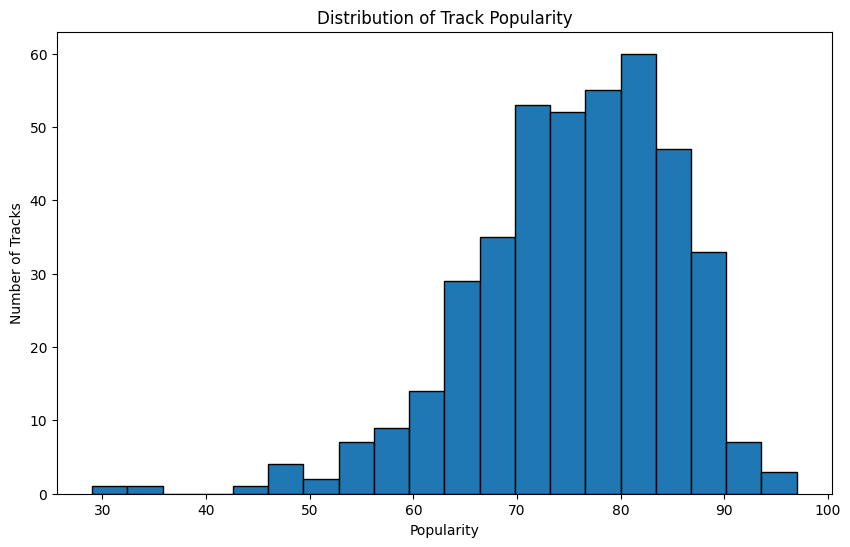

In [ ]:

import matplotlib.pyplot as plt
# Create a histogram of the 'Popularity' column
plt.figure(figsize=(10, 6))
plt.hist(df['Popularity'], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Track Popularity')
plt.show()


3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.


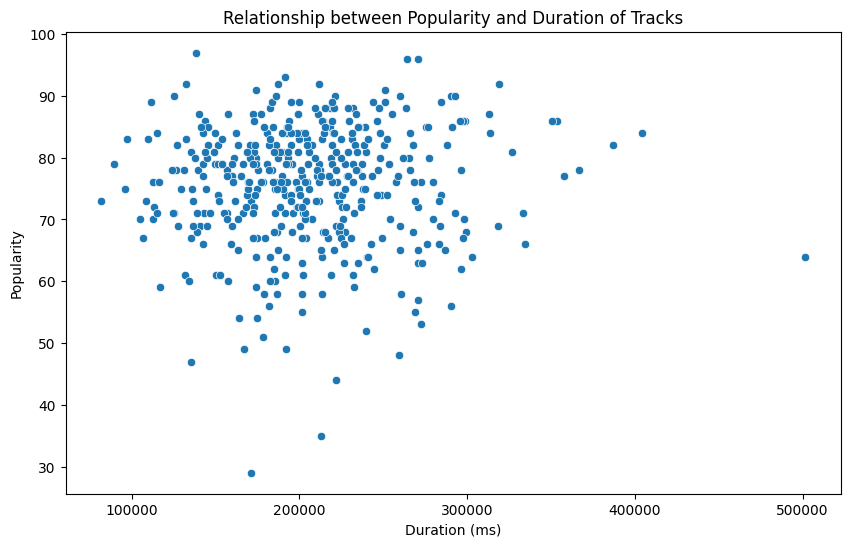

In [ ]:

import matplotlib.pyplot as plt
# Create a scatter plot to visualize the relationship between popularity and duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
plt.title('Relationship between Popularity and Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()


4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot?

The artist with the highest number of tracks is Drake with 17 tracks.


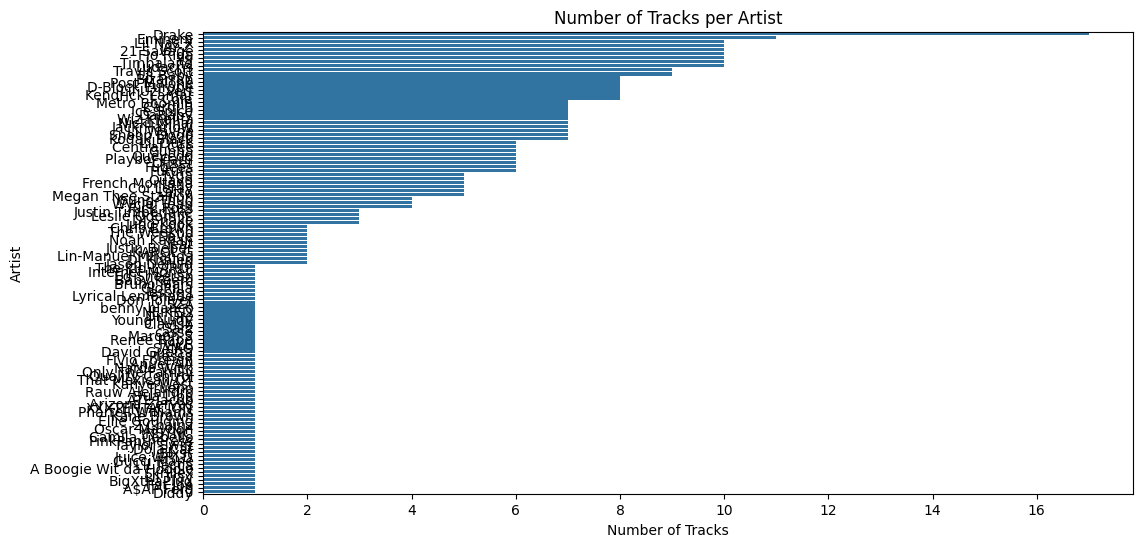

In [ ]:

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and 'Artist' is the column with artist names.

# Count the occurrences of each artist
artist_counts = df['Artist'].value_counts()

# Get the artist with the highest count
highest_count_artist = artist_counts.index[0]
highest_count = artist_counts.iloc[0]

print(f"The artist with the highest number of tracks is {highest_count_artist} with {highest_count} tracks.")

# Create a countplot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().index) # Order the plot by frequency
plt.title('Number of Tracks per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()


5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [ ]:

# Sort the DataFrame by 'Popularity' in ascending order and get the top 5
least_popular_tracks = df.sort_values('Popularity').head(5)

# Display the artist name and track name for the least popular tracks
print(least_popular_tracks[['Artist', 'Track Name']])


             Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix
407     Wyclef Jean      911 (feat. Mary J. Blige)


6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.

In [ ]:

# Group the DataFrame by artist and calculate the average popularity for each artist
average_popularity_by_artist = df.groupby('Artist')['Popularity'].mean()

# Get the top 5 most popular artists
top_5_artists = df['Artist'].value_counts().head(5).index

# Filter the average popularity for the top 5 artists
top_5_average_popularity = average_popularity_by_artist[top_5_artists]

# Find the artist with the highest average popularity among the top 5
artist_with_highest_avg_popularity = top_5_average_popularity.idxmax()
highest_avg_popularity = top_5_average_popularity.max()

print("Average Popularity for Top 5 Artists:")
print(top_5_average_popularity)
print(f"\nThe artist with the highest average popularity among the top 5 is: {artist_with_highest_avg_popularity} with an average popularity of {highest_avg_popularity}")


Average Popularity for Top 5 Artists:
Artist
Drake        82.882353
Eminem       83.636364
Lil Nas X    75.900000
JAY-Z        77.900000
21 Savage    83.800000
Name: Popularity, dtype: float64

The artist with the highest average popularity among the top 5 is: 21 Savage with an average popularity of 83.8


7.  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [ ]:

# Get the top 5 most popular artists
top_5_artists = df['Artist'].value_counts().head(5).index

# Create an empty dictionary to store the most popular track for each artist
most_popular_tracks = {}

# Iterate through the top 5 artists
for artist in top_5_artists:
    # Filter the DataFrame for the current artist
    artist_df = df[df['Artist'] == artist]

    # Find the track with the highest popularity for the current artist
    most_popular_track = artist_df.loc[artist_df['Popularity'].idxmax()]

    # Store the most popular track name in the dictionary
    most_popular_tracks[artist] = most_popular_track['Track Name']

# Print the most popular track for each of the top 5 artists
for artist, track_name in most_popular_tracks.items():
    print(f"Artist: {artist}, Most Popular Track: {track_name}")


Artist: Drake, Most Popular Track: Rich Baby Daddy (feat. Sexyy Red & SZA)
Artist: Eminem, Most Popular Track: Without Me
Artist: Lil Nas X, Most Popular Track: THATS WHAT I WANT
Artist: JAY-Z, Most Popular Track: Ni**as In Paris
Artist: 21 Savage, Most Popular Track: redrum


8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

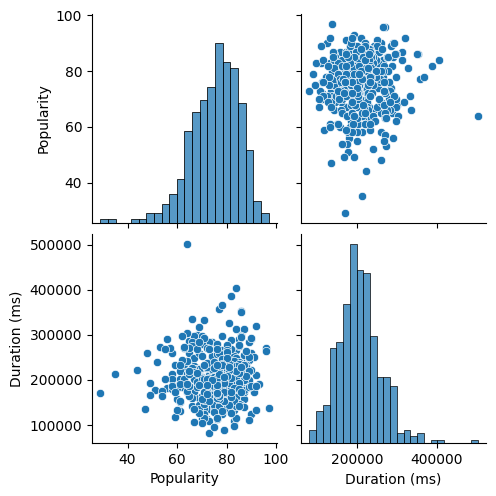

In [95]:

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and it contains numerical columns like 'Popularity', 'Duration (ms)', etc.

# Select the numerical columns you want to include in the pair plot
numerical_cols = ['Popularity', 'Duration (ms)']  # Replace with your actual numerical columns

# Create the pair plot
sns.pairplot(df[numerical_cols])
plt.show()


9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot.

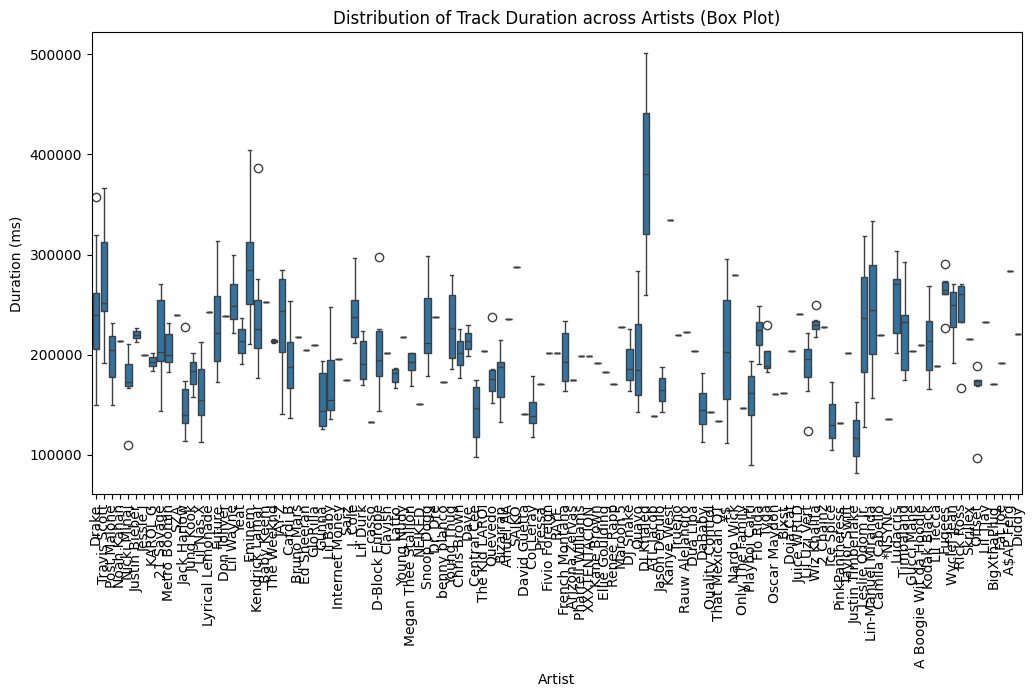

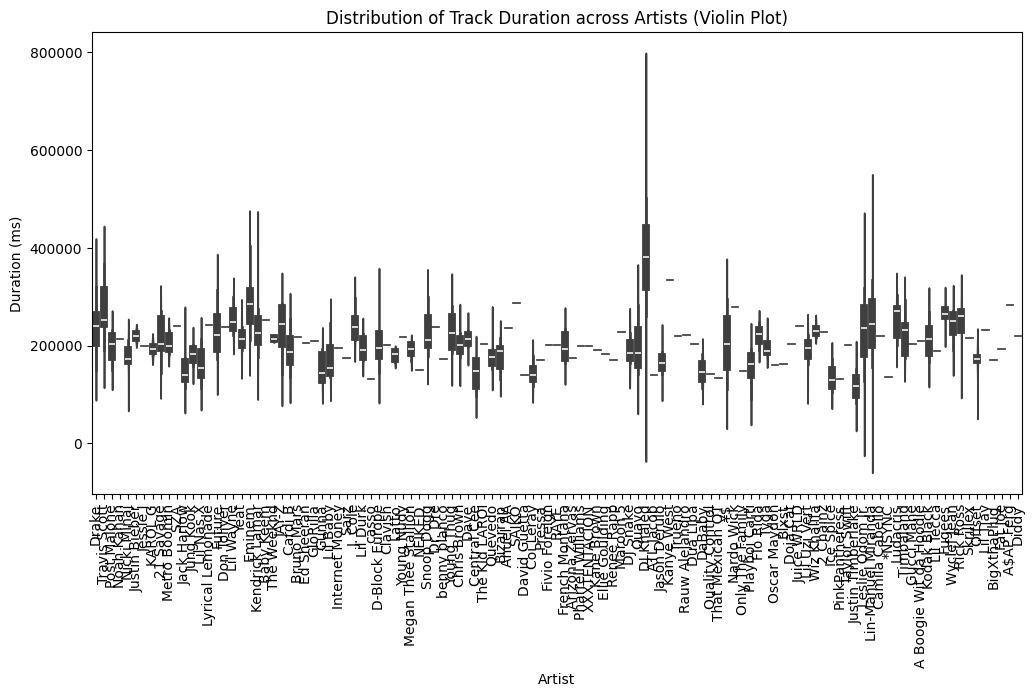

In [96]:

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and it's already loaded and preprocessed.

# Create a box plot to visualize the distribution of track duration for different artists
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Track Duration across Artists (Box Plot)')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.show()

# Create a violin plot for a more detailed visualization
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Duration (ms)', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Track Duration across Artists (Violin Plot)')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.show()


10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

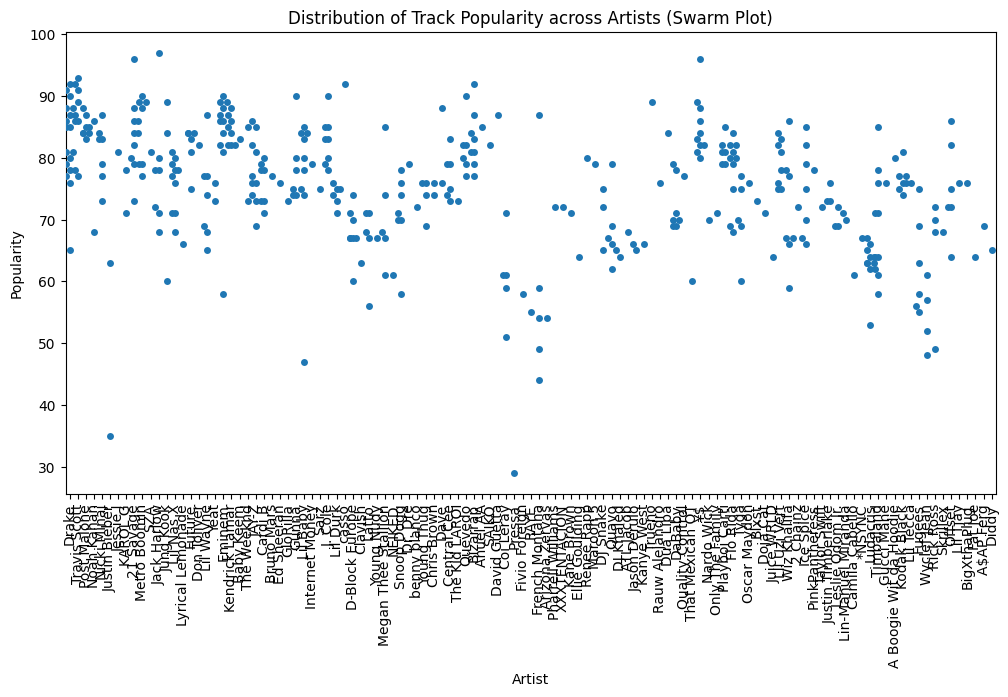

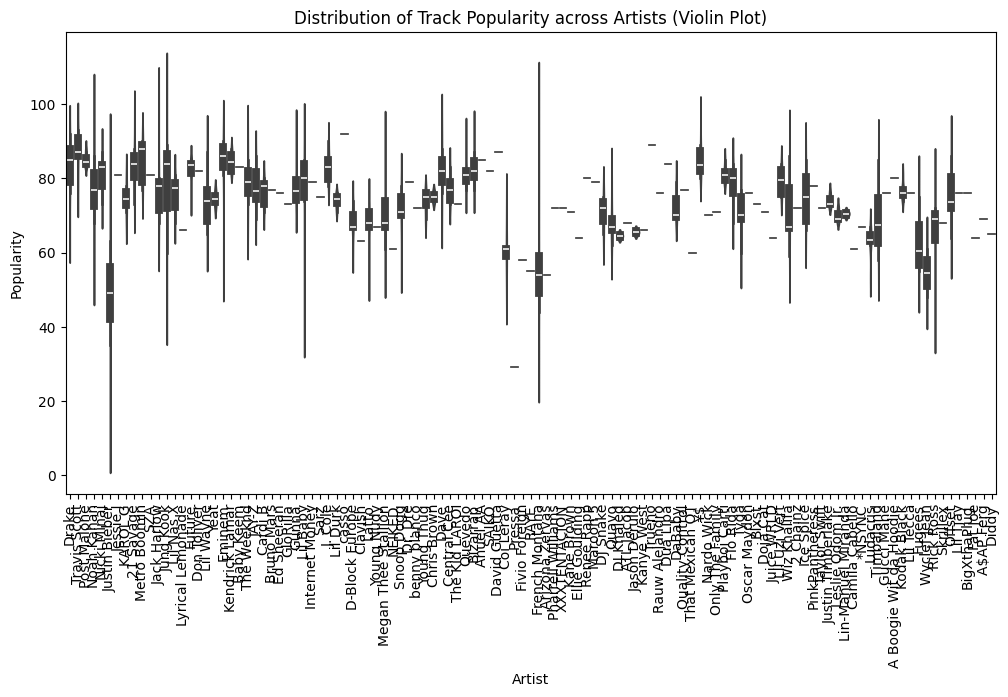

In [97]:

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and it's already loaded and preprocessed.

# Create a swarm plot to visualize the distribution of track popularity for different artists
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Artist', y='Popularity', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Track Popularity across Artists (Swarm Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()

# Create a violin plot for a more detailed visualization
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Track Popularity across Artists (Violin Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()
